In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pcntoolkit as ptk

import os
import pickle
import pandas as pd

from pcntoolkit.util.hbr_utils import *
import scipy
import arviz as av

import gc

In [20]:
features = ['Right-Cerebellum-White-Matter',
            'EstimatedTotalIntraCranialVol',
            'Right-Lateral-Ventricle',
            'WM-hypointensities',
            'Brain-Stem',
            'log_WM-hypointensities']

ordered_features = ['Right-Cerebellum-White-Matter',
            'Right-Lateral-Ventricle',
            'WM-hypointensities',
            'EstimatedTotalIntraCranialVol',
            'Brain-Stem',
                    'log_WM-hypointensities']

names = features
phenotypes = list(map(lambda x: features.index(x), names))

In [21]:
all_Rhats = {}
varnames=['mu_intercept_mu','intercept_sigma']
# varnames = ['epsilon','delta']

model_names = ['Normal', 'SHASHo', 'SHASHb_1','SHASHb_2']
n_rhats = 5
for f in range(n_rhats):
    for l in model_names:
        fold_dir = f'/project_cephfs/3022017.02/projects/stijdboe/make_results/10_folds_results/fold_{f}_{l}'
        for p in phenotypes:
            print(f"{f}, {l}, {p}\t\t\t",end="\r")
            batch_dir = os.path.join(fold_dir, f'batch_{p+1}')
            l_without_underscore = l.replace("_","")
            model_path = os.path.join(batch_dir, 'Models', f'NM_0_0_estimate.pkl')
            print(model_path)
            with open(model_path,  'rb') as file:
                model = pickle.load(file)
                all_Rhats[(f,l,p)] = model.hbr.Rhats(var_names = varnames, resolution=100)
                del model
                gc.collect()
                
                

/project_cephfs/3022017.02/projects/stijdboe/make_results/10_folds_results/fold_0_Normal/batch_1/Models/NM_0_0_estimate.pkl
/project_cephfs/3022017.02/projects/stijdboe/make_results/10_folds_results/fold_0_Normal/batch_2/Models/NM_0_0_estimate.pkl
/project_cephfs/3022017.02/projects/stijdboe/make_results/10_folds_results/fold_0_Normal/batch_3/Models/NM_0_0_estimate.pkl



KeyboardInterrupt



In [ ]:
with open(f'/project_cephfs/3022017.02/projects/stijdboe/make_results/10_folds_results/Rhats/all_Rhats_normal_SHASHo_SHASHb.pkl','wb') as file:
# with open(f'/project_cephfs/3022017.02/projects/stijdboe/make_results/10_folds_results/Rhats/all_Rhats_normal_SHASHo_SHASHb.pkl','wb') as file:

    pickle.dump(all_Rhats, file)

In [22]:
with open(f'/project_cephfs/3022017.02/projects/stijdboe/make_results/10_folds_results/Rhats/all_Rhats_normal_SHASHo_SHASHb.pkl','rb') as file:
    all_Rhats = pickle.load(file)
    

In [23]:
print(all_Rhats.keys())

dict_keys([(0, 'Normal', 0), (0, 'Normal', 1), (0, 'Normal', 2), (0, 'Normal', 3), (0, 'Normal', 4), (0, 'Normal', 5), (0, 'SHASHo', 0), (0, 'SHASHo', 1), (0, 'SHASHo', 2), (0, 'SHASHo', 3), (0, 'SHASHo', 4), (0, 'SHASHo', 5), (0, 'SHASHb_1', 0), (0, 'SHASHb_1', 1), (0, 'SHASHb_1', 2), (0, 'SHASHb_1', 3), (0, 'SHASHb_1', 4), (0, 'SHASHb_1', 5), (0, 'SHASHb_2', 0), (0, 'SHASHb_2', 1), (0, 'SHASHb_2', 2), (0, 'SHASHb_2', 3), (0, 'SHASHb_2', 4), (0, 'SHASHb_2', 5), (1, 'Normal', 0), (1, 'Normal', 1), (1, 'Normal', 2), (1, 'Normal', 3), (1, 'Normal', 4), (1, 'Normal', 5), (1, 'SHASHo', 0), (1, 'SHASHo', 1), (1, 'SHASHo', 2), (1, 'SHASHo', 3), (1, 'SHASHo', 4), (1, 'SHASHo', 5), (1, 'SHASHb_1', 0), (1, 'SHASHb_1', 1), (1, 'SHASHb_1', 2), (1, 'SHASHb_1', 3), (1, 'SHASHb_1', 4), (1, 'SHASHb_1', 5), (1, 'SHASHb_2', 0), (1, 'SHASHb_2', 1), (1, 'SHASHb_2', 2), (1, 'SHASHb_2', 3), (1, 'SHASHb_2', 4), (1, 'SHASHb_2', 5), (2, 'Normal', 0), (2, 'Normal', 1), (2, 'Normal', 2), (2, 'Normal', 3), (2, '

dict_keys(['mu_intercept_mu', 'intercept_sigma'])


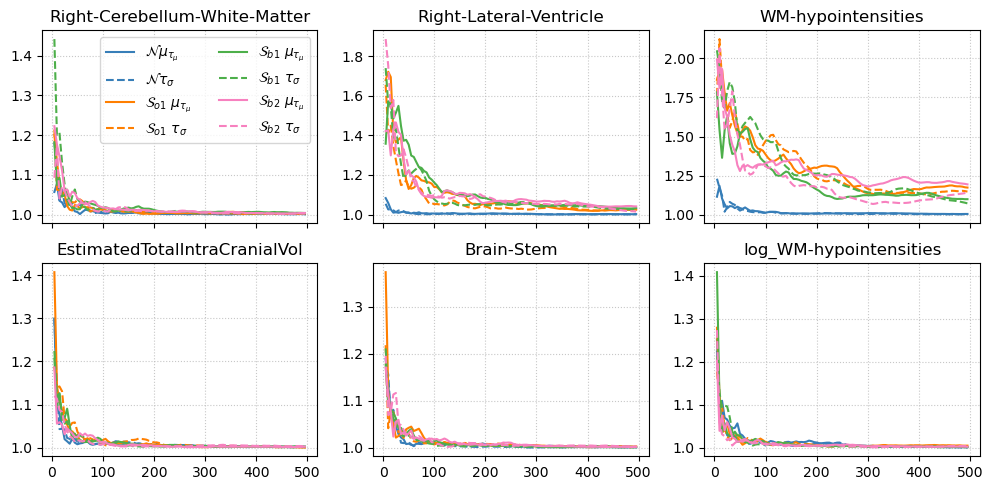

In [27]:
linestyles=  ['-','--']
# varnames = ['epsilon','delta']
# print(all_Rhats.keys)
varnames = all_Rhats[list(all_Rhats.keys())[0]].keys()
print(varnames)
# varnames=  ['mu_intercept_mu','intercept_sigma' ]
cols = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
lmap = {'SHASHo':'$\mathcal{S}_{o1}$ ', 'SHASHb_1':'$\mathcal{S}_{b1}$ ','SHASHb_2':'$\mathcal{S}_{b2}$ ','Normal':'$\mathcal{N}$'}
parmap = {'epsilon':'$\epsilon$','delta':'$\delta$','mu_intercept_mu':'$\mu_{\\tau_\mu}$', 'intercept_sigma':'$\\tau_\sigma$'}
fig, ax = plt.subplots(2,3,figsize=(10,5), sharex = True, sharey = False)
ax = ax.flatten()
for ip, p in enumerate(ordered_features):
    if ip == 6:
        ip += 1
    if1 = features.index(p)
    for il, l in enumerate(model_names):
        for iv,v in enumerate(varnames):
            meanrhat = None
            m = np.zeros(all_Rhats[(0,l,if1)][v].shape)
            for f in range(n_rhats):
                m += all_Rhats[(f,l,if1)][v]
            ax[ip].plot(n_rhats*np.arange(m.shape[0]),m/n_rhats, color=cols[il], label = lmap[l]+parmap[v], linestyle = linestyles[iv])
    if ip == 0:
        ax[ip].legend(fontsize=10, ncol=2)
    ax[ip].set_title(p)
    ax[ip].grid(linestyle=":",alpha=0.7)
plt.tight_layout()
plt.savefig(f"/home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis/imgs/Rhats_SHASHo-SHASHb.pdf")
plt.show()
plt.close()
